## 作業一 (完成時間 2021/4/8)
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [72]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y,yhat):
    """
    請完成這個 Function 後往下執行
    """
    mse = sum((y-yhat)**2)/len(y)
    return mse

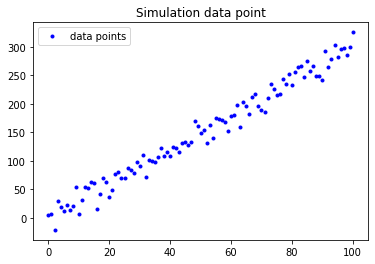

In [85]:
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101) #將 0~100 切成 101 份，並且存在numpy.ndarrray 中
np.random.seed(20210408) # 透過 random seed 將隨機抽樣的結果固定
y = (x_lin + np.random.randn(101) * 5) * w + b # np.random.randn 函數可以產生標準常態的隨機樣本。

plt.plot(x_lin, y, 'b.', label = 'data points') # 利用 plt.plot 畫散佈圖
plt.title("Simulated data point")
plt.legend(loc = 'upper left') # loc = location , 可以填入 str 或 number
plt.show()

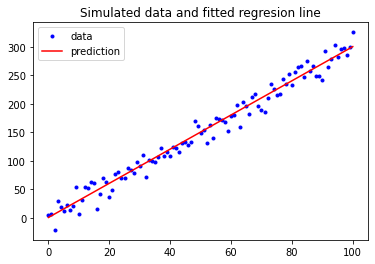

In [87]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Simulated data and fitted regresion line")
plt.legend(loc = 'upper left')
plt.show()

In [89]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 188.041
The Mean absolute error is 10.962


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

資料來源 :https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_test.csv

競賽名稱 : HR Analytics: Job Change of Data Scientists 

資料簡介 : 此筆資料記載A公司求職者的相關資料，如居住城市、年紀、工作經歷、城市發展指標、學歷等等。

#### 1. 你選的這組資料為何重要 ?

   Ans : 減少公司的成本。公司倘若能藉由求職者的資訊找到適合的人才，不但可以為公司帶來收益同時可以減少培訓成本。

#### 2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

   Ans : 公司自己 HR 蒐集，以spreadsheet 的方式貯存

#### 3. 蒐集而來的資料型態為何

   Ans : 大部分的資料都是數值資料 (quantity) 只有少部分是類別資料跟文字 (quality) 

#### 4. 這組資料想解決的問題如何評估 

   Ans : 該筆資料主要想要找到有意願留任且真的會待在該公司服務的人才，因此這是一個分類問題，衡量指標為 Accuracy


# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

#### 1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

   Ans : 我覺得核心問題直覺上可以有兩種量化定義 : 1. 如何提升每月營收 ? 2. 如何提高載客量 ?
   當然還有很多其他的定義方式，舉凡降低閒置時間等。



#### 2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

   Ans : 我們可能會想知道那些特定場所在那些時間點的人潮數量以及對於計程車的需求比率，因此我們可以有以下幾種方式取得資料: 
   (1) 自己蒐集或是委外請人收集 :　我們可以鎖定在特定的場所，舉凡車站，並且派人駐守特定時間，紀錄人潮數量以及搭乘計程車的比例。
   (2) 上政府單位蒐集各大景點或是交通運輸中心的人潮流量資料
   (3) 倘若該車隊有自己的叫車APP (如 呼叫小黃 / Uber / Grab ) 我們便可以透過這些資料分析那些時間點的人對於計程車的需求較高。
   (4) 市場調查，我們可以藉由市場調查來了解消費者對於載客車的需求與喜好。
   
   
   
#### 3. 蒐集而來的資料型態為何

    Ans: 大部分都可能是數值資料，且具有時間相關，少部分可能是文字資料 (市調)



#### 4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

    Ans: 這應該是一個典型的Regression problem，我們期許透過行銷企劃或經營策略來提高營收，因此我們關心的問題是那些變數跟營收有很高的相關性，換句話說，那些變數可以用來解釋營收，而倘若我們針對該問題建構回歸模型，我們的模型評估指標將會是 MSE ，因為我們希望能藉由變數解釋營收的效果越高越好(當然這裡不只侷限在線性模型)，因此我們希望R square 越高越好，MSE越低越好。